In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Input
from tensorflow.python.keras import applications
from tensorflow.python.keras.layers import Conv2D, Convolution2D, MaxPooling2D, ZeroPadding2D
import numpy as np
import pandas as pd

In [2]:
input_layer = Input((196, 196, 3))

In [3]:
#parameters
classes = 12
batch_size = 32
train_total = 3783
validation_total = 967

In [4]:
#1
x = Conv2D(64, (3,3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)
#2
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)
#3
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)
#4
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)
#5
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(classes, activation='softmax')(x)

In [5]:
model = Model(inputs=input_layer, outputs=x)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 196, 196, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 98, 98, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 128)       0         
__________

In [7]:
from tensorflow.python.keras.optimizers import RMSprop

In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.00005),
             metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip=True,
                                    vertical_flip=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
                    'train',
                    target_size=(196,196),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True
                    )
validation_generator = validation_datagen.flow_from_directory(
                        'validation',
                        target_size=(196,196),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 3783 images belonging to 12 classes.
Found 967 images belonging to 12 classes.


In [11]:
model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2)

Epoch 1/10
92s - loss: 2.4395 - acc: 0.1317 - val_loss: 2.4205 - val_acc: 0.1417
Epoch 2/10
85s - loss: 2.4290 - acc: 0.1376 - val_loss: 2.3940 - val_acc: 0.1293
Epoch 3/10
85s - loss: 2.2317 - acc: 0.2331 - val_loss: 2.0667 - val_acc: 0.3092
Epoch 4/10
89s - loss: 1.7759 - acc: 0.3753 - val_loss: 1.6955 - val_acc: 0.3702
Epoch 5/10
88s - loss: 1.5856 - acc: 0.4230 - val_loss: 1.7454 - val_acc: 0.4157
Epoch 6/10
88s - loss: 1.4445 - acc: 0.4728 - val_loss: 1.3673 - val_acc: 0.5140
Epoch 7/10
88s - loss: 1.3058 - acc: 0.5370 - val_loss: 1.8269 - val_acc: 0.4498
Epoch 8/10
89s - loss: 1.1819 - acc: 0.5869 - val_loss: 1.0900 - val_acc: 0.6443
Epoch 9/10
88s - loss: 1.0417 - acc: 0.6294 - val_loss: 1.3571 - val_acc: 0.5750
Epoch 10/10
88s - loss: 0.9634 - acc: 0.6644 - val_loss: 1.1406 - val_acc: 0.5988


In [12]:
model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2)

Epoch 1/10
87s - loss: 0.8770 - acc: 0.6911 - val_loss: 0.7162 - val_acc: 0.7632
Epoch 2/10
87s - loss: 0.8458 - acc: 0.7091 - val_loss: 0.7076 - val_acc: 0.7715
Epoch 3/10
88s - loss: 0.7592 - acc: 0.7376 - val_loss: 0.6843 - val_acc: 0.7570
Epoch 4/10
89s - loss: 0.7061 - acc: 0.7556 - val_loss: 0.7763 - val_acc: 0.7508
Epoch 5/10
87s - loss: 0.6834 - acc: 0.7606 - val_loss: 0.5474 - val_acc: 0.8180
Epoch 6/10
88s - loss: 0.6043 - acc: 0.7849 - val_loss: 0.5479 - val_acc: 0.8335
Epoch 7/10
87s - loss: 0.5556 - acc: 0.8016 - val_loss: 0.4923 - val_acc: 0.8366
Epoch 8/10
84s - loss: 0.5258 - acc: 0.8151 - val_loss: 0.5925 - val_acc: 0.8087
Epoch 9/10
85s - loss: 0.4769 - acc: 0.8306 - val_loss: 0.5349 - val_acc: 0.8397
Epoch 10/10
85s - loss: 0.4483 - acc: 0.8358 - val_loss: 0.5166 - val_acc: 0.8201


In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.000005),
             metrics=['accuracy'])

In [15]:
model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2)

Epoch 1/5
86s - loss: 0.3178 - acc: 0.8833 - val_loss: 0.3554 - val_acc: 0.8852
Epoch 2/5
84s - loss: 0.3042 - acc: 0.8922 - val_loss: 0.3730 - val_acc: 0.8697
Epoch 3/5
84s - loss: 0.2834 - acc: 0.8957 - val_loss: 0.4153 - val_acc: 0.8687
Epoch 4/5
85s - loss: 0.2836 - acc: 0.8991 - val_loss: 0.3296 - val_acc: 0.8790
Epoch 5/5
84s - loss: 0.2757 - acc: 0.8985 - val_loss: 0.4359 - val_acc: 0.8563


In [16]:
model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2)

Epoch 1/5
85s - loss: 0.2533 - acc: 0.9009 - val_loss: 0.3630 - val_acc: 0.8769
Epoch 2/5
84s - loss: 0.2627 - acc: 0.8998 - val_loss: 0.3692 - val_acc: 0.8749
Epoch 3/5
85s - loss: 0.2615 - acc: 0.9031 - val_loss: 0.3773 - val_acc: 0.8749
Epoch 4/5
84s - loss: 0.2529 - acc: 0.9086 - val_loss: 0.3503 - val_acc: 0.8800
Epoch 5/5
85s - loss: 0.2508 - acc: 0.9052 - val_loss: 0.3711 - val_acc: 0.8831


In [24]:
model.save_weights('weights-1.hdf5')

In [10]:
model.load_weights('weights-1.hdf5')

In [11]:
batch_size = 16
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range = 20,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='reflect',
                                    horizontal_flip=True,
                                    vertical_flip=True)
train_generator = train_datagen.flow_from_directory(
                    'train',
                    target_size=(196,196),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True
                    )

Found 3783 images belonging to 12 classes.


In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.00005),
             metrics=['accuracy'])

model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2)

Epoch 1/5
116s - loss: 0.9962 - acc: 0.6652 - val_loss: 0.5539 - val_acc: 0.8251
Epoch 2/5
111s - loss: 0.8660 - acc: 0.7020 - val_loss: 0.4643 - val_acc: 0.8444
Epoch 3/5
108s - loss: 0.7791 - acc: 0.7220 - val_loss: 0.4701 - val_acc: 0.8533
Epoch 4/5
111s - loss: 0.7149 - acc: 0.7589 - val_loss: 0.4200 - val_acc: 0.8538
Epoch 5/5
111s - loss: 0.6814 - acc: 0.7644 - val_loss: 0.5658 - val_acc: 0.8144


In [13]:
model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2)

Epoch 1/5
111s - loss: 0.6504 - acc: 0.7790 - val_loss: 0.4421 - val_acc: 0.8517
Epoch 2/5
111s - loss: 0.5999 - acc: 0.7816 - val_loss: 0.4041 - val_acc: 0.8670
Epoch 3/5
110s - loss: 0.5709 - acc: 0.7960 - val_loss: 0.3698 - val_acc: 0.8712
Epoch 4/5
111s - loss: 0.5602 - acc: 0.8086 - val_loss: 0.3797 - val_acc: 0.8812
Epoch 5/5
111s - loss: 0.5117 - acc: 0.8207 - val_loss: 0.3692 - val_acc: 0.8870


In [14]:
model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2)

Epoch 1/5
113s - loss: 0.5174 - acc: 0.8224 - val_loss: 0.3762 - val_acc: 0.8817
Epoch 2/5
109s - loss: 0.5192 - acc: 0.8192 - val_loss: 0.3158 - val_acc: 0.8906
Epoch 3/5
109s - loss: 0.4686 - acc: 0.8368 - val_loss: 0.3098 - val_acc: 0.8901
Epoch 4/5
108s - loss: 0.4571 - acc: 0.8388 - val_loss: 0.3186 - val_acc: 0.9075
Epoch 5/5
108s - loss: 0.4023 - acc: 0.8578 - val_loss: 0.3648 - val_acc: 0.9012


In [15]:
model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2)

Epoch 1/5
109s - loss: 0.4337 - acc: 0.8475 - val_loss: 0.3530 - val_acc: 0.8764
Epoch 2/5
108s - loss: 0.4429 - acc: 0.8448 - val_loss: 0.2834 - val_acc: 0.9027
Epoch 3/5
108s - loss: 0.4055 - acc: 0.8550 - val_loss: 0.3009 - val_acc: 0.9033
Epoch 4/5
108s - loss: 0.4107 - acc: 0.8629 - val_loss: 0.3191 - val_acc: 0.9006
Epoch 5/5
108s - loss: 0.3880 - acc: 0.8686 - val_loss: 0.2701 - val_acc: 0.9175


In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.000005),
             metrics=['accuracy'])

In [19]:
model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2)

Epoch 1/5
108s - loss: 0.2266 - acc: 0.9161 - val_loss: 0.2305 - val_acc: 0.9290
Epoch 2/5
109s - loss: 0.2126 - acc: 0.9219 - val_loss: 0.2227 - val_acc: 0.9259
Epoch 3/5
108s - loss: 0.2029 - acc: 0.9270 - val_loss: 0.2221 - val_acc: 0.9390
Epoch 4/5
110s - loss: 0.2018 - acc: 0.9264 - val_loss: 0.2314 - val_acc: 0.9264
Epoch 5/5


KeyboardInterrupt: 

In [21]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
                    'test',
                    shuffle=False,
                    target_size=(196,196),
                    batch_size=batch_size,
                    class_mode=None)

Found 794 images belonging to 1 classes.


In [23]:
test_samples = len(test_generator.filenames)
print(test_samples)

794


In [24]:
predictions = model.predict_generator(test_generator,int(np.ceil(794/16)))


In [35]:
train_generator.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [36]:
class_ids = {train_generator.class_indices[x]: x for x in train_generator.class_indices}

In [37]:
class_ids

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [38]:
predicted_classes = [class_ids[x] for x in np.argmax(predictions, axis=1)]

In [39]:
predicted_classes

['Cleavers',
 'Fat Hen',
 'Maize',
 'Small-flowered Cranesbill',
 'Loose Silky-bent',
 'Fat Hen',
 'Small-flowered Cranesbill',
 'Scentless Mayweed',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Charlock',
 'Shepherds Purse',
 'Maize',
 'Sugar beet',
 'Scentless Mayweed',
 'Black-grass',
 'Cleavers',
 'Small-flowered Cranesbill',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Black-grass',
 'Scentless Mayweed',
 'Small-flowered Cranesbill',
 'Common wheat',
 'Scentless Mayweed',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Charlock',
 'Small-flowered Cranesbill',
 'Sugar beet',
 'Shepherds Purse',
 'Maize',
 'Shepherds Purse',
 'Cleavers',
 'Scentless Mayweed',
 'Maize',
 'Loose Silky-bent',
 'Fat Hen',
 'Sugar beet',
 'Shepherds Purse',
 'Common Chickweed',
 'Sugar beet',
 'Charlock',
 'Loose Silky-bent',
 'Sugar beet',
 'Common Chickweed',
 'Cleavers',
 'Common Chickweed',
 'Maize',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Loose Silky-bent',


In [27]:
from os.path import basename
test_ids = [basename(x) for x in test_generator.filenames]

In [28]:
test_ids[0]

'4bbfd1e05.png'

In [40]:
submission = pd.DataFrame({'file':test_ids,'species':predicted_classes})
submission.to_csv('submission_vgg_16.csv', encoding="utf8", index=False)

In [42]:
from IPython.display import FileLink
FileLink('submission_vgg_16.csv')

/home/janardhan/plant_seeding/submission_vgg_16.csv

In [ ]:
# PB LB: 0.93450

In [37]:
tmp = """Epoch 1/10
92s - loss: 2.4395 - acc: 0.1317 - val_loss: 2.4205 - val_acc: 0.1417
Epoch 2/10
85s - loss: 2.4290 - acc: 0.1376 - val_loss: 2.3940 - val_acc: 0.1293
Epoch 3/10
85s - loss: 2.2317 - acc: 0.2331 - val_loss: 2.0667 - val_acc: 0.3092
Epoch 4/10
89s - loss: 1.7759 - acc: 0.3753 - val_loss: 1.6955 - val_acc: 0.3702
Epoch 5/10
88s - loss: 1.5856 - acc: 0.4230 - val_loss: 1.7454 - val_acc: 0.4157
Epoch 6/10
88s - loss: 1.4445 - acc: 0.4728 - val_loss: 1.3673 - val_acc: 0.5140
Epoch 7/10
88s - loss: 1.3058 - acc: 0.5370 - val_loss: 1.8269 - val_acc: 0.4498
Epoch 8/10
89s - loss: 1.1819 - acc: 0.5869 - val_loss: 1.0900 - val_acc: 0.6443
Epoch 9/10
88s - loss: 1.0417 - acc: 0.6294 - val_loss: 1.3571 - val_acc: 0.5750
Epoch 10/10
88s - loss: 0.9634 - acc: 0.6644 - val_loss: 1.1406 - val_acc: 0.5988
Epoch 1/10
87s - loss: 0.8770 - acc: 0.6911 - val_loss: 0.7162 - val_acc: 0.7632
Epoch 2/10
87s - loss: 0.8458 - acc: 0.7091 - val_loss: 0.7076 - val_acc: 0.7715
Epoch 3/10
88s - loss: 0.7592 - acc: 0.7376 - val_loss: 0.6843 - val_acc: 0.7570
Epoch 4/10
89s - loss: 0.7061 - acc: 0.7556 - val_loss: 0.7763 - val_acc: 0.7508
Epoch 5/10
87s - loss: 0.6834 - acc: 0.7606 - val_loss: 0.5474 - val_acc: 0.8180
Epoch 6/10
88s - loss: 0.6043 - acc: 0.7849 - val_loss: 0.5479 - val_acc: 0.8335
Epoch 7/10
87s - loss: 0.5556 - acc: 0.8016 - val_loss: 0.4923 - val_acc: 0.8366
Epoch 8/10
84s - loss: 0.5258 - acc: 0.8151 - val_loss: 0.5925 - val_acc: 0.8087
Epoch 9/10
85s - loss: 0.4769 - acc: 0.8306 - val_loss: 0.5349 - val_acc: 0.8397
Epoch 10/10
85s - loss: 0.4483 - acc: 0.8358 - val_loss: 0.5166 - val_acc: 0.8201
Epoch 1/5
86s - loss: 0.3178 - acc: 0.8833 - val_loss: 0.3554 - val_acc: 0.8852
Epoch 2/5
84s - loss: 0.3042 - acc: 0.8922 - val_loss: 0.3730 - val_acc: 0.8697
Epoch 3/5
84s - loss: 0.2834 - acc: 0.8957 - val_loss: 0.4153 - val_acc: 0.8687
Epoch 4/5
85s - loss: 0.2836 - acc: 0.8991 - val_loss: 0.3296 - val_acc: 0.8790
Epoch 5/5
84s - loss: 0.2757 - acc: 0.8985 - val_loss: 0.4359 - val_acc: 0.8563
Epoch 1/5
85s - loss: 0.2533 - acc: 0.9009 - val_loss: 0.3630 - val_acc: 0.8769
Epoch 2/5
84s - loss: 0.2627 - acc: 0.8998 - val_loss: 0.3692 - val_acc: 0.8749
Epoch 3/5
85s - loss: 0.2615 - acc: 0.9031 - val_loss: 0.3773 - val_acc: 0.8749
Epoch 4/5
84s - loss: 0.2529 - acc: 0.9086 - val_loss: 0.3503 - val_acc: 0.8800
Epoch 5/5
85s - loss: 0.2508 - acc: 0.9052 - val_loss: 0.3711 - val_acc: 0.8831
"""

In [38]:
tmp = tmp.splitlines()
print(tmp)

['Epoch 1/10', '92s - loss: 2.4395 - acc: 0.1317 - val_loss: 2.4205 - val_acc: 0.1417', 'Epoch 2/10', '85s - loss: 2.4290 - acc: 0.1376 - val_loss: 2.3940 - val_acc: 0.1293', 'Epoch 3/10', '85s - loss: 2.2317 - acc: 0.2331 - val_loss: 2.0667 - val_acc: 0.3092', 'Epoch 4/10', '89s - loss: 1.7759 - acc: 0.3753 - val_loss: 1.6955 - val_acc: 0.3702', 'Epoch 5/10', '88s - loss: 1.5856 - acc: 0.4230 - val_loss: 1.7454 - val_acc: 0.4157', 'Epoch 6/10', '88s - loss: 1.4445 - acc: 0.4728 - val_loss: 1.3673 - val_acc: 0.5140', 'Epoch 7/10', '88s - loss: 1.3058 - acc: 0.5370 - val_loss: 1.8269 - val_acc: 0.4498', 'Epoch 8/10', '89s - loss: 1.1819 - acc: 0.5869 - val_loss: 1.0900 - val_acc: 0.6443', 'Epoch 9/10', '88s - loss: 1.0417 - acc: 0.6294 - val_loss: 1.3571 - val_acc: 0.5750', 'Epoch 10/10', '88s - loss: 0.9634 - acc: 0.6644 - val_loss: 1.1406 - val_acc: 0.5988', 'Epoch 1/10', '87s - loss: 0.8770 - acc: 0.6911 - val_loss: 0.7162 - val_acc: 0.7632', 'Epoch 2/10', '87s - loss: 0.8458 - acc: 

In [39]:
tmp = [x for x in tmp if x[0] != 'E']
tmp

['92s - loss: 2.4395 - acc: 0.1317 - val_loss: 2.4205 - val_acc: 0.1417',
 '85s - loss: 2.4290 - acc: 0.1376 - val_loss: 2.3940 - val_acc: 0.1293',
 '85s - loss: 2.2317 - acc: 0.2331 - val_loss: 2.0667 - val_acc: 0.3092',
 '89s - loss: 1.7759 - acc: 0.3753 - val_loss: 1.6955 - val_acc: 0.3702',
 '88s - loss: 1.5856 - acc: 0.4230 - val_loss: 1.7454 - val_acc: 0.4157',
 '88s - loss: 1.4445 - acc: 0.4728 - val_loss: 1.3673 - val_acc: 0.5140',
 '88s - loss: 1.3058 - acc: 0.5370 - val_loss: 1.8269 - val_acc: 0.4498',
 '89s - loss: 1.1819 - acc: 0.5869 - val_loss: 1.0900 - val_acc: 0.6443',
 '88s - loss: 1.0417 - acc: 0.6294 - val_loss: 1.3571 - val_acc: 0.5750',
 '88s - loss: 0.9634 - acc: 0.6644 - val_loss: 1.1406 - val_acc: 0.5988',
 '87s - loss: 0.8770 - acc: 0.6911 - val_loss: 0.7162 - val_acc: 0.7632',
 '87s - loss: 0.8458 - acc: 0.7091 - val_loss: 0.7076 - val_acc: 0.7715',
 '88s - loss: 0.7592 - acc: 0.7376 - val_loss: 0.6843 - val_acc: 0.7570',
 '89s - loss: 0.7061 - acc: 0.7556 - v

In [40]:
import re

In [41]:
train_loss = [float(re.search('loss: ([0-9\.]+)', x).group(1)) for x in tmp]
train_acc  = [float(re.search('acc: ([0-9\.]+)', x).group(1)) for x in tmp]
val_loss   = [float(re.search('val_loss: ([0-9\.]+)', x).group(1)) for x in tmp]
val_acc    = [float(re.search('val_acc: ([0-9\.]+)', x).group(1)) for x in tmp]

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
len(train_loss)

30

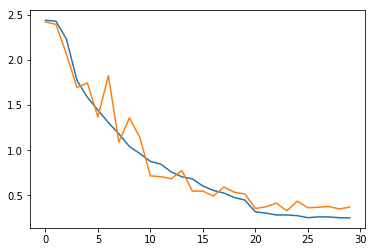

In [46]:
plt.plot(range(30), train_loss,
         range(30), val_loss);

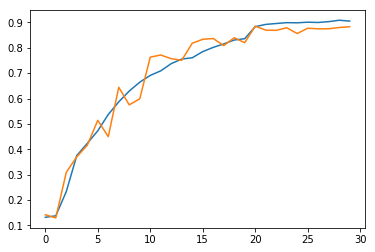

In [47]:
plt.plot(range(30), train_acc,
         range(30), val_acc);